In [1]:
import pandas as pd

In [2]:
dfRaw = pd.read_csv("/Users/ianchang/Library/Mobile Documents/com~apple~CloudDocs/1. Project/Baseball/baseball/Data/statcast_pitch_swing_data_20240402_20240630.csv", low_memory=False)

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length
0,FF,2024-04-02,95.0,-2.01,5.22,"Rocchio, Brayan",677587,622491,single,hit_into_play,...,0,4,0,Infield shade,Standard,239.0,-0.006,0.388,NaN,NaN
1,CH,2024-04-02,88.5,-2.09,4.95,"Rocchio, Brayan",677587,622491,NaN,foul,...,0,4,0,Standard,Standard,253.0,0.000,-0.045,NaN,NaN
2,SI,2024-04-02,95.0,-2.02,5.12,"Rocchio, Brayan",677587,622491,NaN,called_strike,...,0,4,0,Standard,Standard,238.0,0.000,-0.042,NaN,NaN
3,SI,2024-04-02,90.7,-1.26,5.13,"Ohtani, Shohei",660271,657277,walk,ball,...,5,5,2,Infield shade,Standard,234.0,0.009,0.082,NaN,NaN
4,FF,2024-04-02,95.4,-1.95,5.12,"Hedges, Austin",595978,622491,strikeout,foul_tip,...,0,4,0,Standard,Standard,238.0,0.008,-0.215,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346245,SL,2024-06-30,85.9,1.63,5.68,"Cave, Jake",595909,694363,NaN,called_strike,...,2,3,2,Standard,Standard,144.0,0.000,-0.067,NaN,NaN
346246,SL,2024-06-30,89.9,-1.12,6.41,"Jiménez, Eloy",650391,641755,NaN,blocked_ball,...,3,3,3,Standard,Standard,200.0,0.000,0.057,NaN,NaN
346247,CU,2024-06-30,73.7,-2.44,5.80,"Rice, Ben",700250,670102,NaN,called_strike,...,1,8,1,Infield shade,Standard,47.0,0.000,-0.033,NaN,NaN
346248,FF,2024-06-30,94.1,2.97,5.97,"Merrifield, Whit",593160,677053,NaN,ball,...,5,5,6,Standard,Standard,139.0,0.000,0.032,NaN,NaN


In [ ]:
for index, row in dfRaw.iterrows():
    if pd.isna(row["events"]):
        dfRaw.loc[index, "events"] = row["description"]
        print("missing event replaced with description")
dfRaw = dfRaw.drop(columns=["description",'spin_dir', 'spin_rate_deprecated', 'break_angle_deprecated','break_length_deprecated'])

In [37]:
dfRaw.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'spin_dir', 'spin_rate_deprecated', 'break_angle_deprecated',
       'break_length_deprecated', 'zone', 'des', 'game_type', 'stand',
       'p_throws', 'home_team', 'away_team', 'type', 'hit_location', 'bb_type',
       'balls', 'strikes', 'game_year', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z',
       'on_3b', 'on_2b', 'on_1b', 'outs_when_up', 'inning', 'inning_topbot',
       'hc_x', 'hc_y', 'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2',
       'umpire', 'sv_id', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top',
       'sz_bot', 'hit_distance_sc', 'launch_speed', 'launch_angle',
       'effective_speed', 'release_spin_rate', 'release_extension', 'game_pk',
       'pitcher_1', 'fielder_2_1', 'fielder_3', 'fielder_4', 'fielder_5',
       'fielder_6', 'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estimated_ba_using_speedangl

In [40]:
dfSwingLength = dfRaw[pd.notna(dfRaw["swing_length"])].drop(columns=['spin_dir', 'spin_rate_deprecated', 'break_angle_deprecated', 'break_length_deprecated', 'tfs_deprecated', 'tfs_zulu_deprecated','fielder_2_1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6', 'fielder_7', 'fielder_8', 'fielder_9','home_score', 'away_score','post_away_score','post_home_score', 'post_bat_score', 'post_fld_score'])
dfSwingLength.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,zone,...,pitch_name,bat_score,fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length
3628,FS,2024-04-03,90.1,-2.36,5.30,"Ramírez, Harold",623912,543135,strikeout,13.0,...,Split-Finger,0,1,Standard,Standard,244.0,-0.023,-0.084,77.264946,7.79280
3631,FF,2024-04-03,96.7,-2.49,5.03,"Ramírez, Harold",623912,543135,foul,6.0,...,4-Seam Fastball,0,1,Standard,Standard,236.0,0.000,0.000,68.912017,6.29951
3633,CU,2024-04-03,83.6,-0.87,6.10,"Fermin, Freddy",666023,669203,strikeout,14.0,...,Curveball,2,0,Standard,Standard,56.0,0.012,-0.143,43.064275,7.35609
3637,FC,2024-04-03,95.9,-1.12,5.91,"Fermin, Freddy",666023,669203,foul,9.0,...,Cutter,2,0,Standard,Standard,183.0,0.000,0.000,69.626229,7.35832
3638,FS,2024-04-03,88.2,-2.42,5.41,"Ramírez, Harold",623912,543135,foul_tip,13.0,...,Split-Finger,0,1,Standard,Standard,245.0,0.000,-0.023,79.459217,7.96483


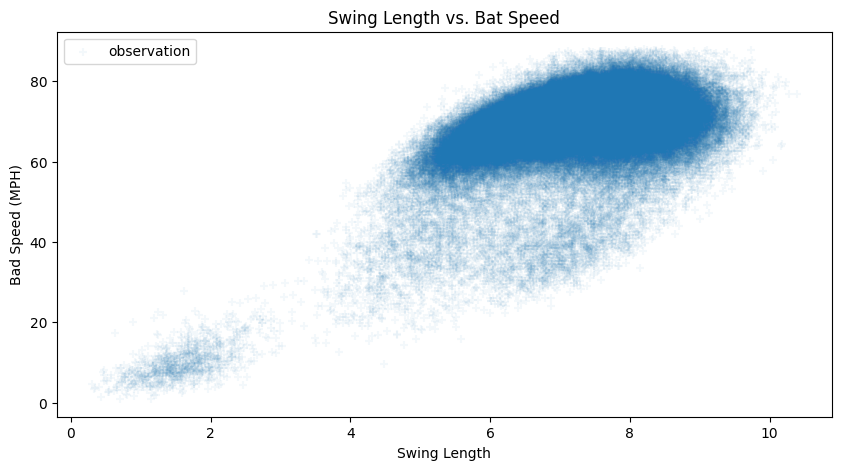

In [50]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(dfSwingLength.swing_length, dfSwingLength.bat_speed, alpha = .05, marker = "+", label = "observation")
ax.set_xlabel("Swing Length")
ax.set_ylabel("Bad Speed (MPH)")
ax.set_title("Swing Length vs. Bat Speed")

ax.legend()
plt.show()